In [1]:
import scanpy as sc

from scGIST import scGIST
from scGIST import test_classifier

In [ ]:
# path to the AnnData h5ad file
file_path = './data/pbmc3k/pbmc3k.h5ad'

In [2]:
# load the h5ad file
adata = sc.read_h5ad(file_path)

In [ ]:
# column that contains the label of the cell types
label_column = 'leiden'

In [3]:
n_genes = adata.X.shape[1]
n_classes = adata.obs['leiden'].unique().size

In [4]:
panel_size = 60
gist = scGIST()
gist.create_model(n_genes, n_classes, panel_size=panel_size, alpha=0.2)
gist.compile_model()
gist.train_model(adata, 'leiden', verbose=0, epochs=200)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


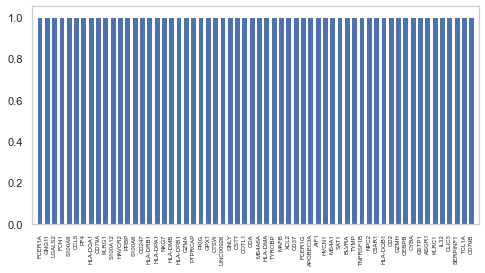

In [5]:
# get marker names and plot the marker weights
markers = gist.get_markers_names(adata, verbose=0, plot_weights=True)

In [6]:
# get accuracy and macro-f1 score of the markers using KNN
# first get the indices of the markers
markers_indices = gist.get_markers_indices()
accuracy, f1 = test_classifier(adata, 'leiden', markers=markers_indices)